# DSCI 100 - Group Project: Predictive Modeling of Gaming Newsletter Subscriptions!
Group 14, Section 009

GitHub Repository Link: https://github.com/anasakbar-05/DSCI_100_Group_Project_009_14

### Introduction

    For this project, we are working with a real dataset from a UBC Computer Science research group led by Frank Wood. The group studies how people play video games by running their own Minecraft server, where the players' in-game actions are automatically recorded as they move around and interact with the world. Since this is an ongoing research project, the team needs assistance figuring out how to target the right kinds of players that will give them lots of data, and how to allocate limited resources (server hardware and software licenses) with the goal of supporting their research. To guide their decisions, they outlined three broad questions related to predicting player behaviour, player types, and server usage patterns. The chosen question will then be used to formulate a more specific question that can be answered within the scope of this project and course (DSCI 100).

Our group decided to focus on the first broad question: 

**What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?** 

Then, we specified it into one clear research question for the project:

**“Can a player’s `age`, `experience` level, and `gender` be used to accurately predict their subscription status to the game-related newsletter?”**

    To answer this, we used the "players.csv" dataset provided by the research group. It includes player demographics (such as gender and age), gameplay behaviours (like experience level and total hours played), and whether or not each player subscribed to the newsletter. With these variables, we can explore patterns across different kinds of players and build a model that predicts subscription status based on gameplay and demographic features. It will be useful to the research group to allow them to better understand what drives player engagement and how to target their future recruitment efforts.

*Note: while a secondary dataset, sessions.csv, is available, this analysis will focus on players.csv for a focused approach to answering the specific research question with the most relevant data.*

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(dplyr)

url = "http://drive.google.com/uc?rxport-download&id=19dtTv9I4hUdTKPBrM1QgI3A0ru68ssds"
players <- read_csv(url)
head(players)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


In [2]:
players_summary <- summary(players)
players_summary

distinct(players, experience)
distinct(players, subscribe)
distinct(players, gender)

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

experience
<chr>
Pro
Veteran
Amateur
Regular
Beginner


subscribe
<lgl>
TRUE
FALSE


gender
<chr>
Male
Female
Non-binary
Prefer not to say
Agender
Two-Spirited
Other


### Description of the Players dataset — players.csv

The players.csv file contains data on 196 players (it has 196 observations) and includes 7 variables describing each player’s. Each row represents one unique player.

| Variable name    | Type      | Meaning                                                                                                                                  |
| ---------------- | --------- | ---------------------------------------------------------------------------------------------------------------------------------------- |
| **experience**   | Character | Self-reported experience level. Categories include: *Beginner, Regular, Amateur, Pro, Veteran*.                                          |
| **subscribe**    | Logical   | Whether a player subscribed to the game-related newsletter (*TRUE/FALSE*).                                                               |
| **hashedEmail**  | Character | A hashed version of each player’s email address (used as an anonymized identifier).                                                      |
| **played_hours** | Numeric   | Total number of hours the player spent in the game during the session.  |
| **name**         | Character | Player’s display name.                                                                                                                   |
| **gender**       | Character | The player’s gender identity. Categories include: *Female, Male, Non-binary, Two-Spirited, Agender, Prefer not to say, Other*.           |
| **Age**          | Numeric    | Player’s self-reported age in years.                                                                                                                   |

### Summary Statistics:


**`Played hours`**
|**Mean**|**Median**|**Min**|**Max**|
|--- | --- |--- | --- |
| 5.85| 0.10|0|223.1|

**`Age`**
|**Mean**|**Median**|**Min**|**Max**|
|--- | --- |--- | --- |
| 21.14| 19.00|9|58|

**`Subscription count`**
|**Subscribed**|**Not**|
|--- | --- |
|144| 52|

### Observations & Potential Issues With the Data:

The `"played_hours"` of players is a highly skewed variable as most players have very low values. This might affect the conclusions we can draw from any analysis. It also (played_hours) may not reflect true gameplay as players can leave the game running while AFK (away from keyboard), which could have inflated their hours. This is why it will not be used for this analysis.

The dataset favours players who interacted verbally/talked in the game, since data collection depends on player communication; this is what was said in the researchers FAQ: "Playing without talking is discouraged, If we detect that you are playing with other players without talking, we might remove you from the server." This means the sample might not represent/include quieter or less social players. This limits its size and the dataset may have less diversity in player types and could underrepresent certain playstyles or demographics.
(Source: https://plaicraft.ai/faq/gameplay).

Other smaller, but still notable details about the dataset include the following:

1. The `"hashedEmail"` isn’t very helpful analytically. Since it’s hashed, we can’t decode it or use it for linking across datasets.

2. `"Age"` may not be fully reliable. Players can easily enter an inaccurate age, introducing systematic measurement error.

3. `"experience"` and `"gender"` will have to be converted to factor-type variables for further analysis.

## Methods and Results

For our question, we plan to use **Knn-Classification** on the predicators, `Gender`, `Age`, `Experience`, to predict when `subscribe` = `True`. We chose Knn-Classification because it predicts a categorical response variable, just like our `subscribed`, which is split into two categories of `true` and `false`. 

This plan presents certain limitations like class imbalance in `gender` where the `Male` category has a large majority and is therefore more likely to be predicted out of probability. Furthermore, other limitations of the Knn-classification algorithm includes biases towards variables with a larger numerical range; to resolve this issue, we will standardize (both variables will be centered and scaled to have a mean of zero and a standard deviation of one) before splitting up the data into testing and training sets. An addititional prerequisite step would be would to convert `experience` and `gender` into a numeric vector before starting. 

We will **split the data into 75% training and 25% testing** sets. 
Prior to the classification:  

1. standardize the data
2. split into training/ testing
3. cross-validate and k-tune to find best K, with the highest accuracy.
4. use on testing set to find accuracy and precision of model
5. evaluate excellence of model, consider if further revisions of the model is needed.

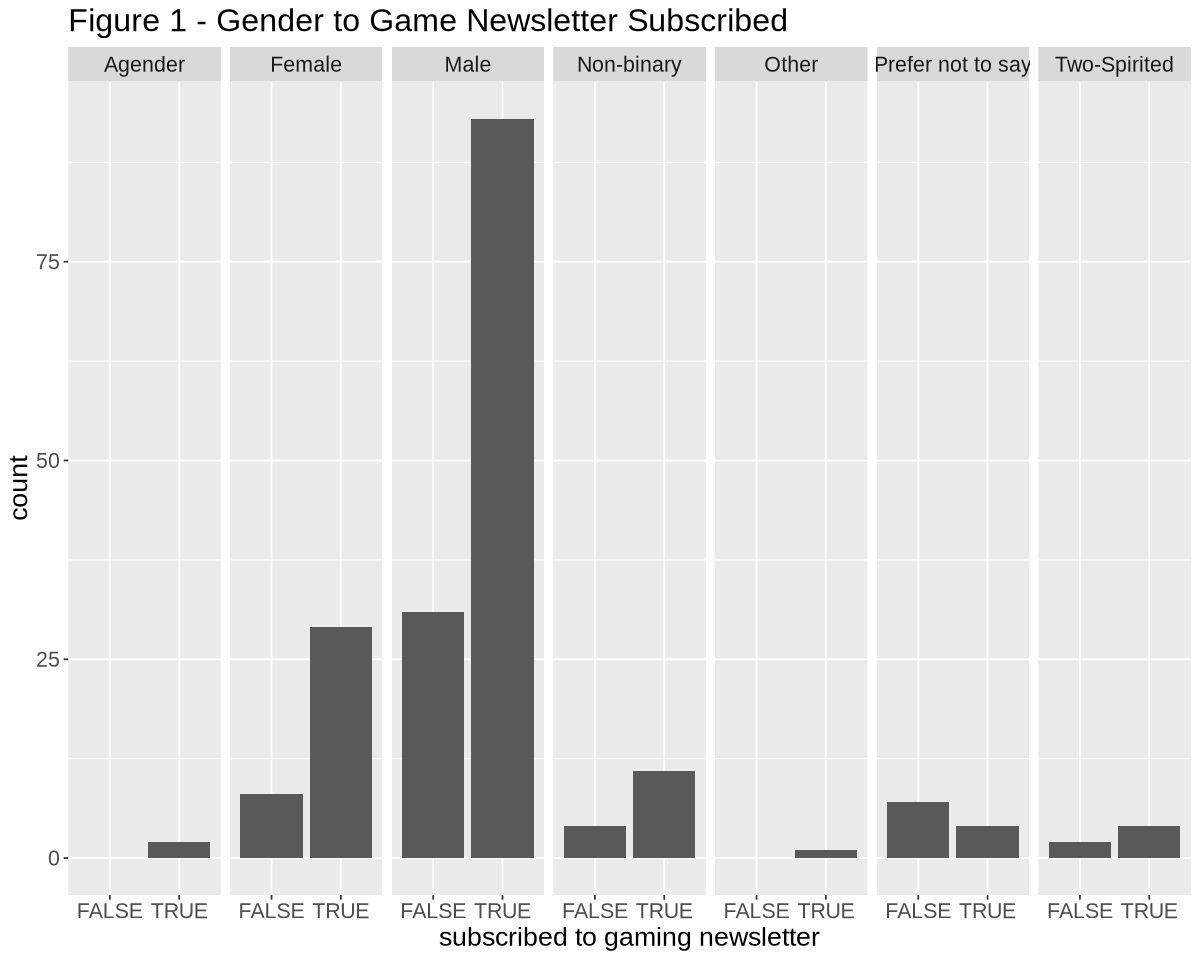

Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_density()`).”


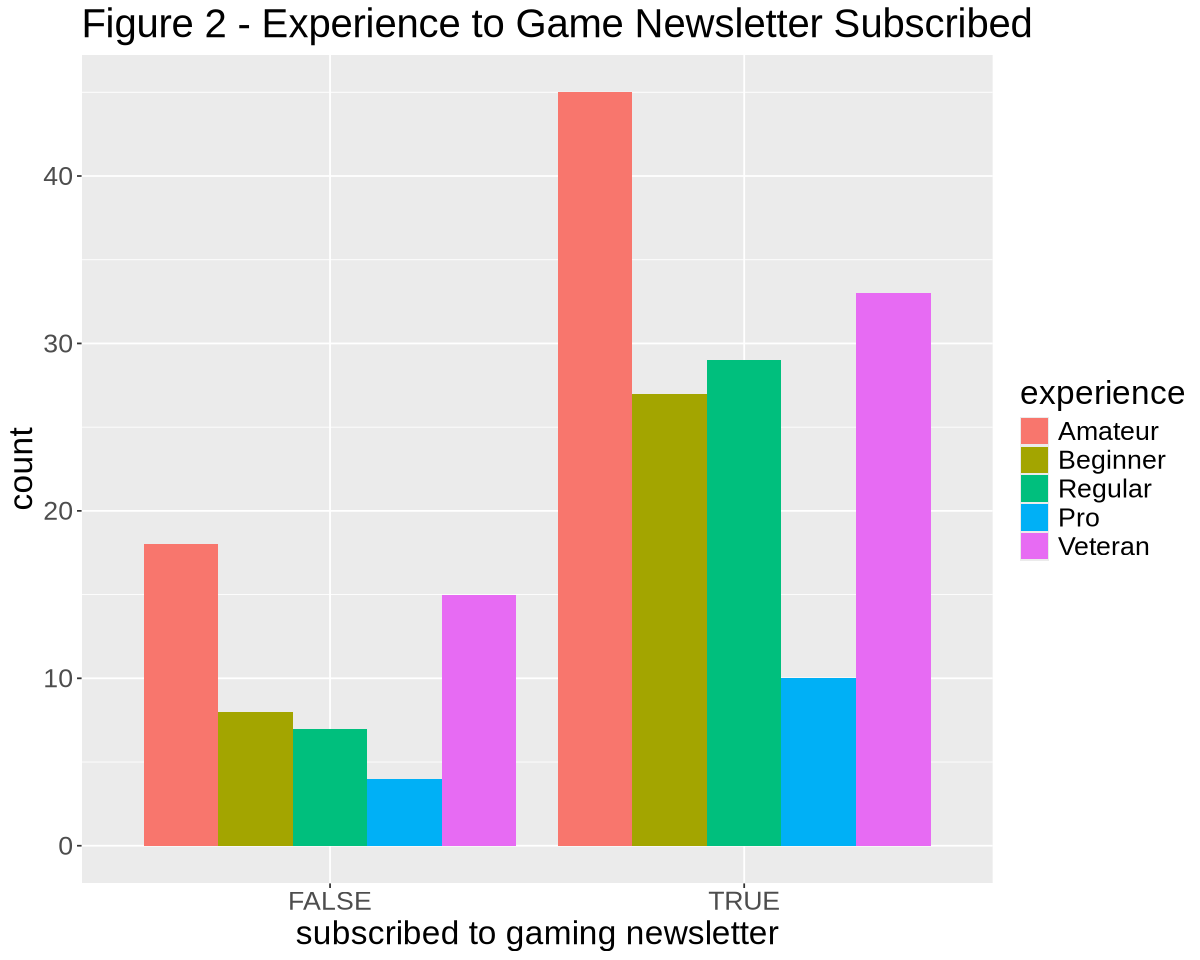

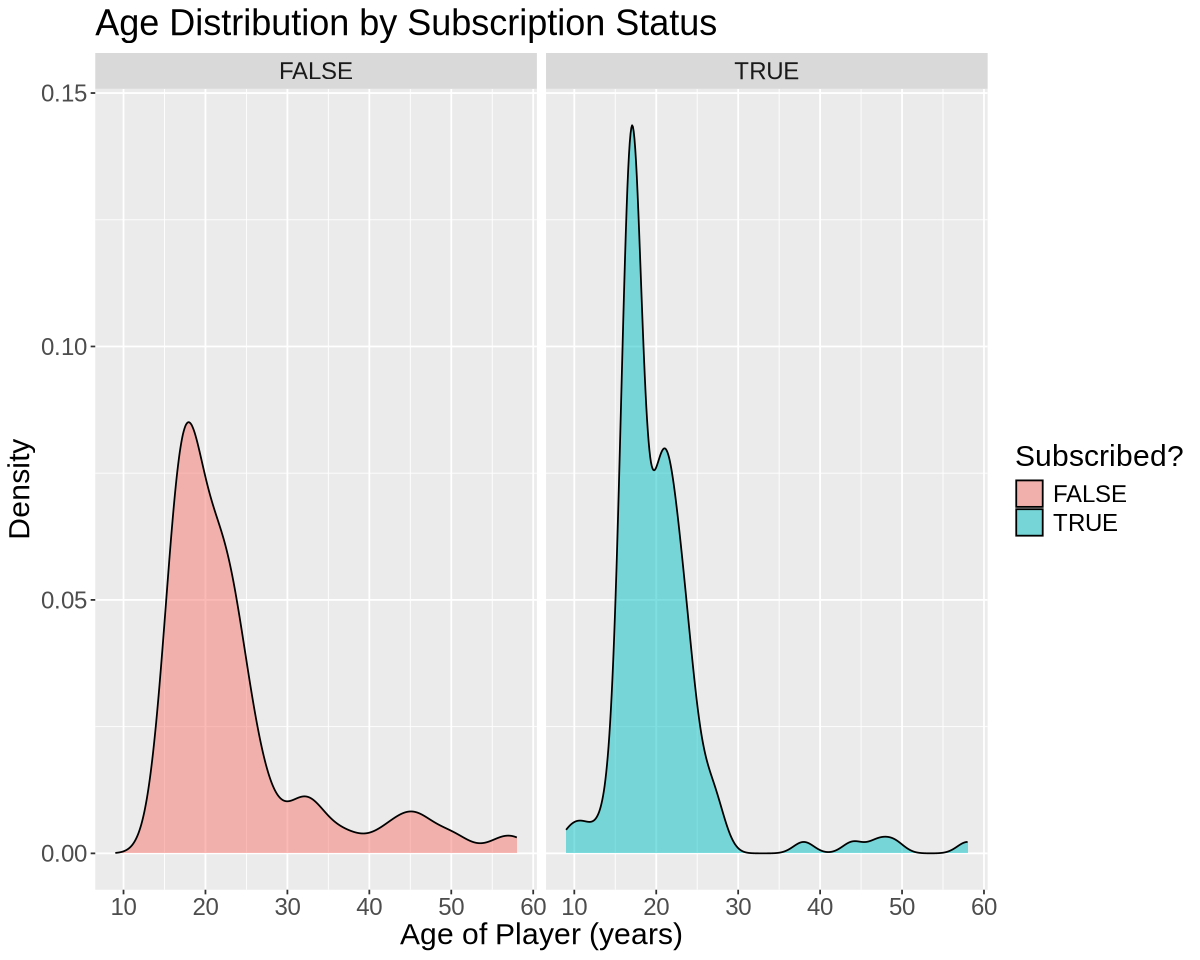

In [25]:
options(repr.plot.width = 10, repr.plot.height = 8)
figure_1 <- ggplot(players, aes(x=subscribe)) + geom_bar() + facet_grid(cols = vars(gender)) + 
    labs( title = "Figure 1 - Gender to Game Newsletter Subscribed") +
    xlab("subscribed to gaming newsletter") +
    theme(text = element_text(size=16))
# the goal of this figure is to relate and show a relationship or draw a conclusion from the variables 
#subcription and gender

figure_2 <- ggplot(players, aes(x=subscribe)) + geom_bar(aes(fill=experience), position="dodge") + 
    labs( title = "Figure 2 - Experience to Game Newsletter Subscribed") +
    xlab("subscribed to gaming newsletter") +
    theme(text = element_text(size=20))
# the goal of this figure is to relate and show a relationship or draw a conclusion from the variables 
#subcription and experiance

figure_3 <- ggplot(players, aes(x = Age, fill = subscribe)) +
  geom_density(alpha = 0.5) +
  facet_wrap(vars(subscribe)) +
  labs(
    title = "Age Distribution by Subscription Status",
    x = "Age of Player (years)",
    y = "Density",
    fill = "Subscribed?"
  ) +
  theme(text = element_text(size = 18))
# the goal of this figure is to relate and show a relationship or draw a conclusion from the variables 
#subcription and Age


figure_1
figure_2
figure_3


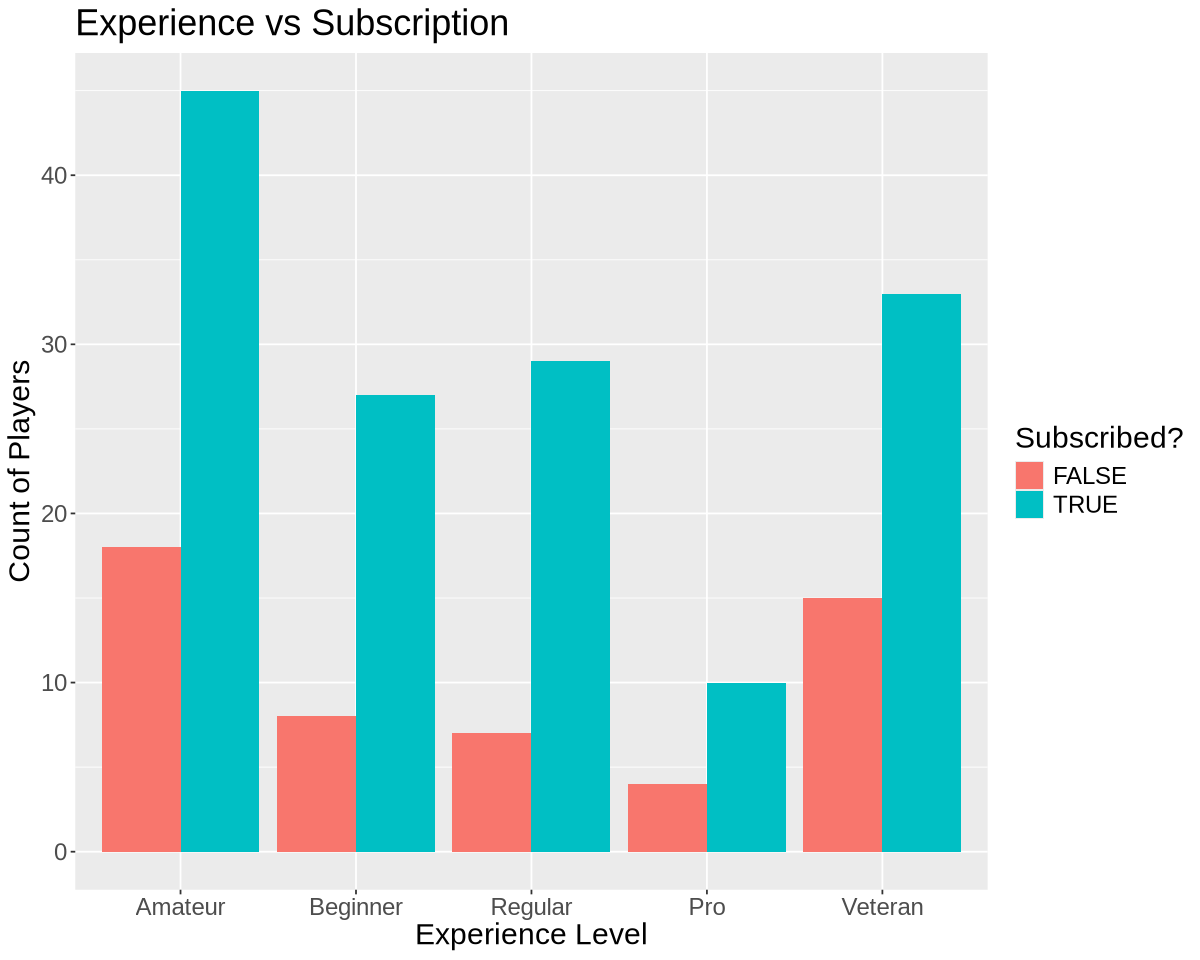

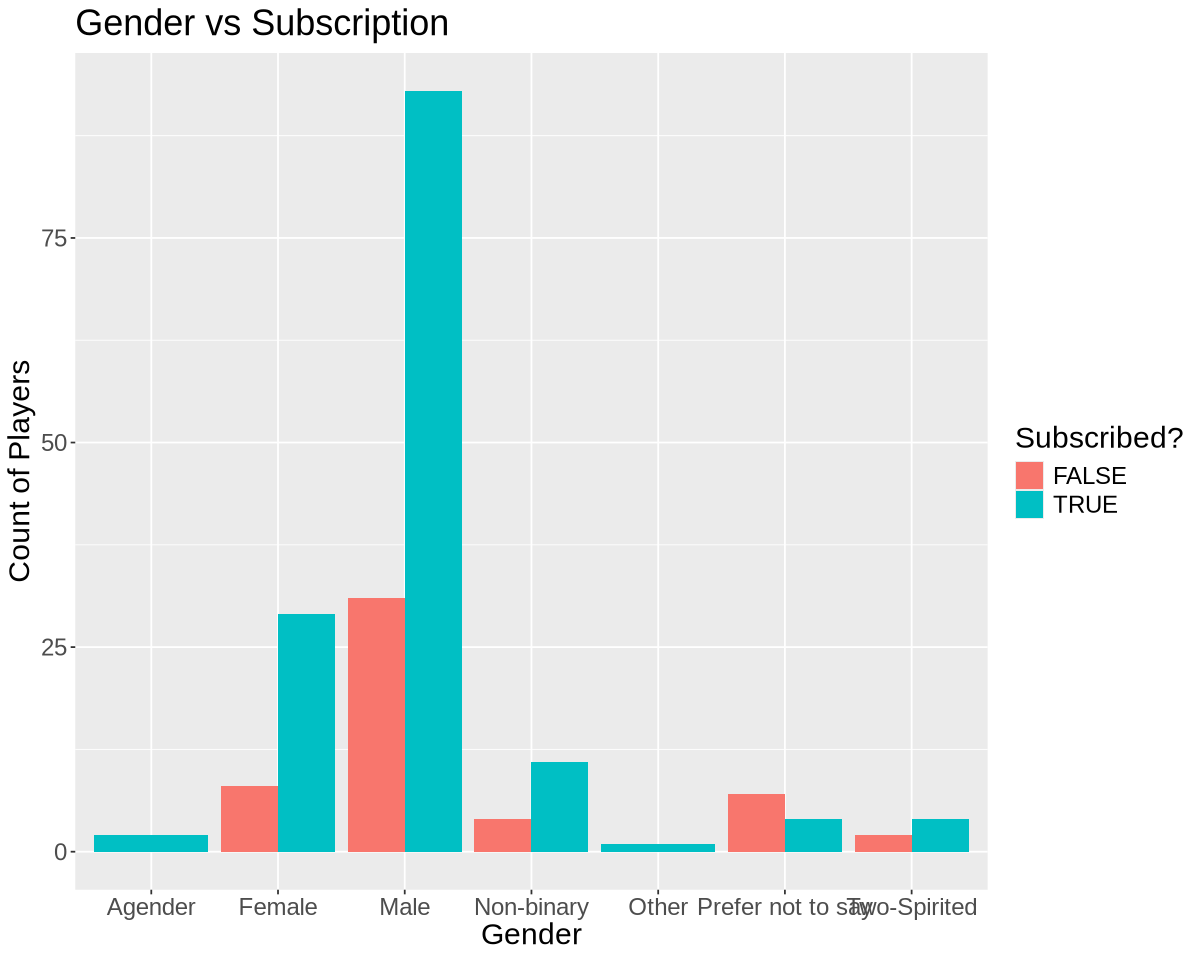

In [24]:
figure_exp <- ggplot(players, aes(x = experience, fill = subscribe)) +
  geom_bar(position = "dodge") +
  labs(
    title = "Experience vs Subscription",
    x = "Experience Level",
    y = "Count of Players",
    fill = "Subscribed?"
  ) +
  theme(text = element_text(size = 18))
figure_exp

figure_gender <- ggplot(players, aes(x = gender, fill = subscribe)) +
  geom_bar(position = "dodge") +
  labs(
    title = "Gender vs Subscription",
    x = "Gender",
    y = "Count of Players",
    fill = "Subscribed?"
  ) +
  theme(text = element_text(size = 18))
figure_gender

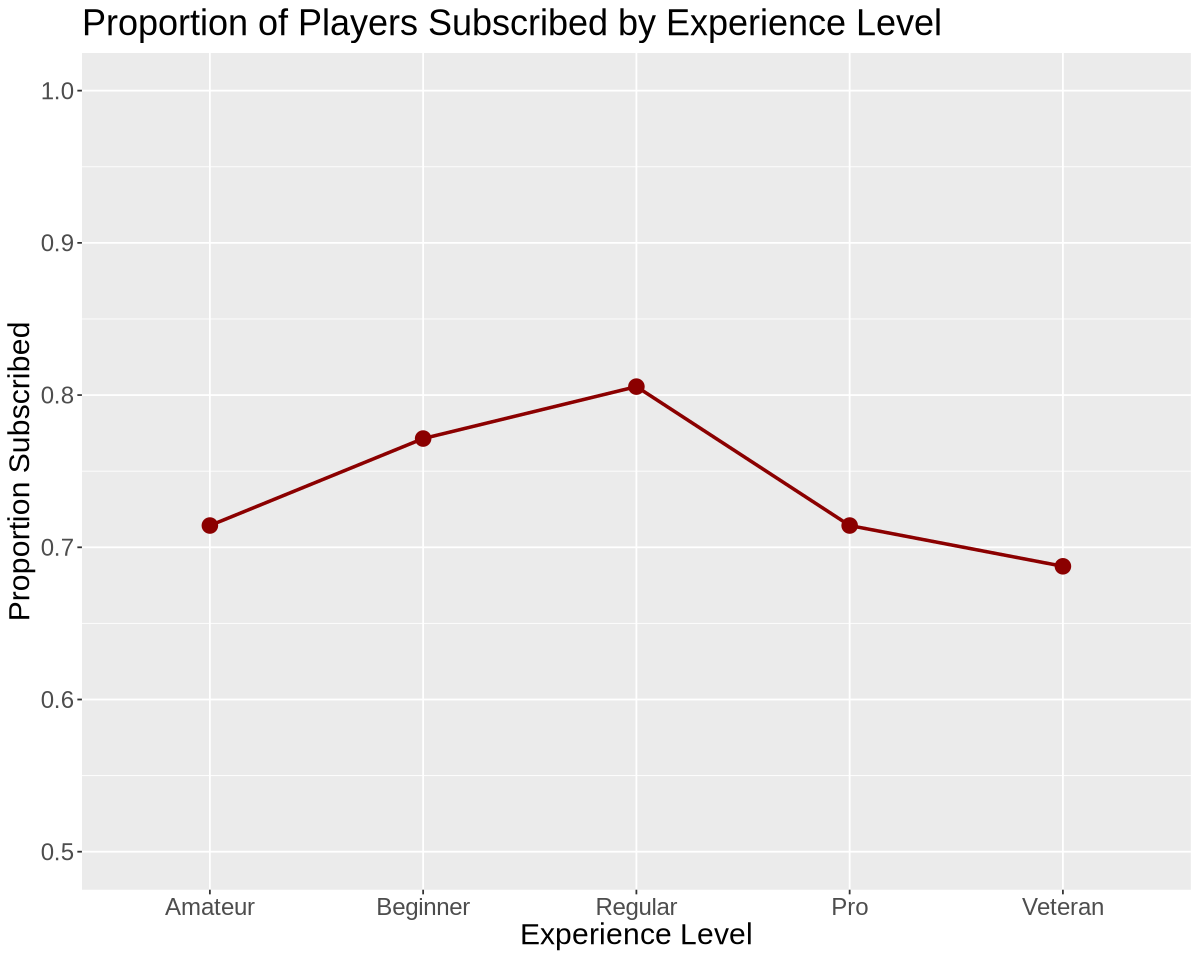

In [23]:

players$experience <- factor(players$experience,
                             levels = c("Amateur", "Beginner", "Regular", "Pro", "Veteran"))

prop_exp <- players|>
  group_by(experience) |>
  summarise(
    proportion_subscribed = mean(subscribe == TRUE)
  )
figure_prop_exp2 <- ggplot(prop_exp, aes(x = experience, y = proportion_subscribed)) +
  geom_point(size = 4, color = "darkred") +
  geom_line(group = 1, color = "darkred", linewidth = 1) +
  #scale_y_continuous(labels = scales::percent_format(accuracy = 1)) +
  labs(
    title = "Proportion of Players Subscribed by Experience Level",
    x = "Experience Level",
    y = "Proportion Subscribed"
  ) +
  theme(text = element_text(size = 18))+
    ylim(0.5, 1)

figure_prop_exp2 

This tell us teh more experianced players like Pros, and Veterans are predicted to be less likely to subcribe to our newsletter. This could help the research lab identify and search for why this is the case, as we want super heavy players that give us a lot of data to participate.

In [31]:
#Getting rid of any NAs in the data and filtering so any players with no playtime is eliminated from the data frame.
clean_players <- players |> 
            select(c(1,2,4,6,7))|>
            filter(!is.na(Age))|> 
            filter(played_hours>0)


clean_players$subscribe <- factor(clean_players$subscribe)
head(clean_players)

experience,subscribe,played_hours,gender,Age
<chr>,<fct>,<dbl>,<chr>,<dbl>
Pro,TRUE,30.3,Male,9
Veteran,TRUE,3.8,Male,17
Amateur,TRUE,0.7,Female,21
Regular,TRUE,0.1,Male,21
Amateur,TRUE,0.1,Male,47
Veteran,TRUE,1.6,Female,23


In [46]:
clean_players$experience <- factor(clean_players$experience)
one_hot_matrix <- model.matrix(~ experience - 1, data = clean_players)
one_hot_players <- clean_players|>select(c(2,3))|>
    bind_cols(as_tibble(one_hot_matrix))

head(one_hot_players)

subscribe,played_hours,experienceAmateur,experienceBeginner,experiencePro,experienceRegular,experienceVeteran
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TRUE,30.3,0,0,1,0,0
TRUE,3.8,0,0,0,0,1
TRUE,0.7,1,0,0,0,0
TRUE,0.1,0,0,0,1,0
TRUE,0.1,1,0,0,0,0
TRUE,1.6,0,0,0,0,1


In [47]:
#split
players_split <- initial_split(one_hot_players, prop = 0.75, strata = subscribe)
players_train <- training(players_split)
players_test <- testing(players_split)

In [48]:
#recipe
players_recipe <- recipe(subscribe ~., data = players_train)|>
step_scale(all_predictors())|>
step_center(all_predictors())

In [49]:
# specification
players_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune())|>
set_engine("kknn")|>
set_mode("classification")

In [50]:
#k-values
players_ks <- tibble(neighbors = 1:10)

In [51]:
#v-fold
players_vfold <- vfold_cv(players_train, v = 5, strata = subscribe)

In [54]:
#workflow + validation
players_tune_fit <- workflow()|>
        add_recipe(players_recipe)|>
        add_model(players_tune)|>
        tune_grid(resamples = players_vfold, grid = players_ks)

In [53]:
#Number of K accuracy check
players_tune_accuracy <- players_tune_fit|> collect_metrics()|>
    filter(.metric == "accuracy")|>
    select(neighbors, mean)|>
    arrange(-mean)

players_tune_accuracy

neighbors,mean
<int>,<dbl>
6,0.7286275
8,0.7286275
5,0.7168627
7,0.7152941
10,0.7137255
9,0.7003922
3,0.6549020
4,0.6549020
1,0.6180392


## Discussion

summarize what you found  
discuss whether this is what you expected to find  
discuss what impact could such findings have  
discuss what future questions could this lead to

## References